Quick cross sections of selected features. 

In [1]:
##import cell makes its appearance once again...
%matplotlib inline
import numpy as np
import pandas as pd
import math
from random import seed
from random import randint
from random import sample
import xarray as xr

import pickle

##plotting related imports
import matplotlib.pyplot as plt
from matplotlib import rcParams #For changing text properties
from cartopy import crs as ccrs #Useful for plotting maps
import cartopy.util #Requires separate import
from cartopy.util import add_cyclic_point
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.path as mpath
import matplotlib.colors as mcolors

In [2]:
from EOF_def import EOF_def

In [3]:
# load input solvers
infile = open("../../eof_analysis/solvers/Usolver_20.p","rb",)
Usolver = pickle.load(infile)  
infile.close()

infile = open("../../eof_analysis/solvers/EHFsolver_20.p","rb",)
EHFsolver = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
infile.close()

infile = open("../../eof_analysis/solvers/GPHsolver_20.p","rb",)
GPHsolver = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
infile.close()

In [4]:
## U
U_EOF_nw, U_EOF_nw2d, U_eigenv, U_VarEx, U_PC = EOF_def(Usolver, 10)
## EHF
EHF_EOF_nw, EHF_EOF_nw2d, EHF_eigenv, EHF_VarEx, EHF_PC = EOF_def(EHFsolver, 45)
## GPH
GPH_EOF_nw, GPH_EOF_nw2d, GPH_eigenv, GPH_VarEx, GPH_PC = EOF_def(GPHsolver, 10)

<class 'numpy.ndarray'> (7998, 10)
<class 'numpy.ndarray'> (7998, 45)
<class 'numpy.ndarray'> (7998, 10)


In [5]:
## U
U_EOF_nw = U_EOF_nw[1:]
U_EOF_nw2d = U_EOF_nw2d[1:]
U_eigenv = U_eigenv[1:]  
U_VarEx = U_VarEx [1:]
U_PC = U_PC[:, 1:]

U_PC.shape

(7998, 9)

In [6]:
## EHF
EHF_EOF_nw = EHF_EOF_nw[1:]
EHF_EOF_nw2d = EHF_EOF_nw2d[1:]
EHF_eigenv = EHF_eigenv[1:]  
EHF_VarEx = EHF_VarEx [1:]
EHF_PC = EHF_PC[:, 1:]

EHF_PC.shape

(7998, 44)

In [7]:
## GPH
GPH_EOF_nw = GPH_EOF_nw[1:]
GPH_EOF_nw2d = GPH_EOF_nw2d[1:]
GPH_eigenv = GPH_eigenv[1:]  
GPH_VarEx = GPH_VarEx [1:]
GPH_PC = GPH_PC[:, 1:]

GPH_PC.shape

(7998, 9)

In [8]:
##set lat and lon arrays
##separate set of longitudes for PV and others
lat = np.arange(90, 18, -2)
lon = np.arange(0, 360, 2)

lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print(lev[::-1])

[1000.  975.  950.  925.  900.  875.  850.  825.  800.  775.  750.  700.
  650.  600.  550.  500.  450.  400.  350.  300.  250.  225.  200.  175.
  150.  125.  100.   70.   50.   30.   20.   10.    7.    5.    3.    2.
    1.]


In [11]:
##EUROPE Index([1, 56, 54, 0, 17, 9, 57, 2, 16, 33], dtype='int64')
area = ["Europe", "eur"]

U_plot = ["PC 3", "PC 2", "PC 4"]
##1, 0, 2
U_index = [1,0,2]

EHF_plot = ["PC 2", "PC 10", "PC 9", "PC 26"]
##9, 17, 16, 33
EHF_index = [0, 8, 7, 24]

GPH_plot = ["PC 5", "PC 3", "PC 6"]
##56, 54, 57
GPH_index = [3, 1, 4]

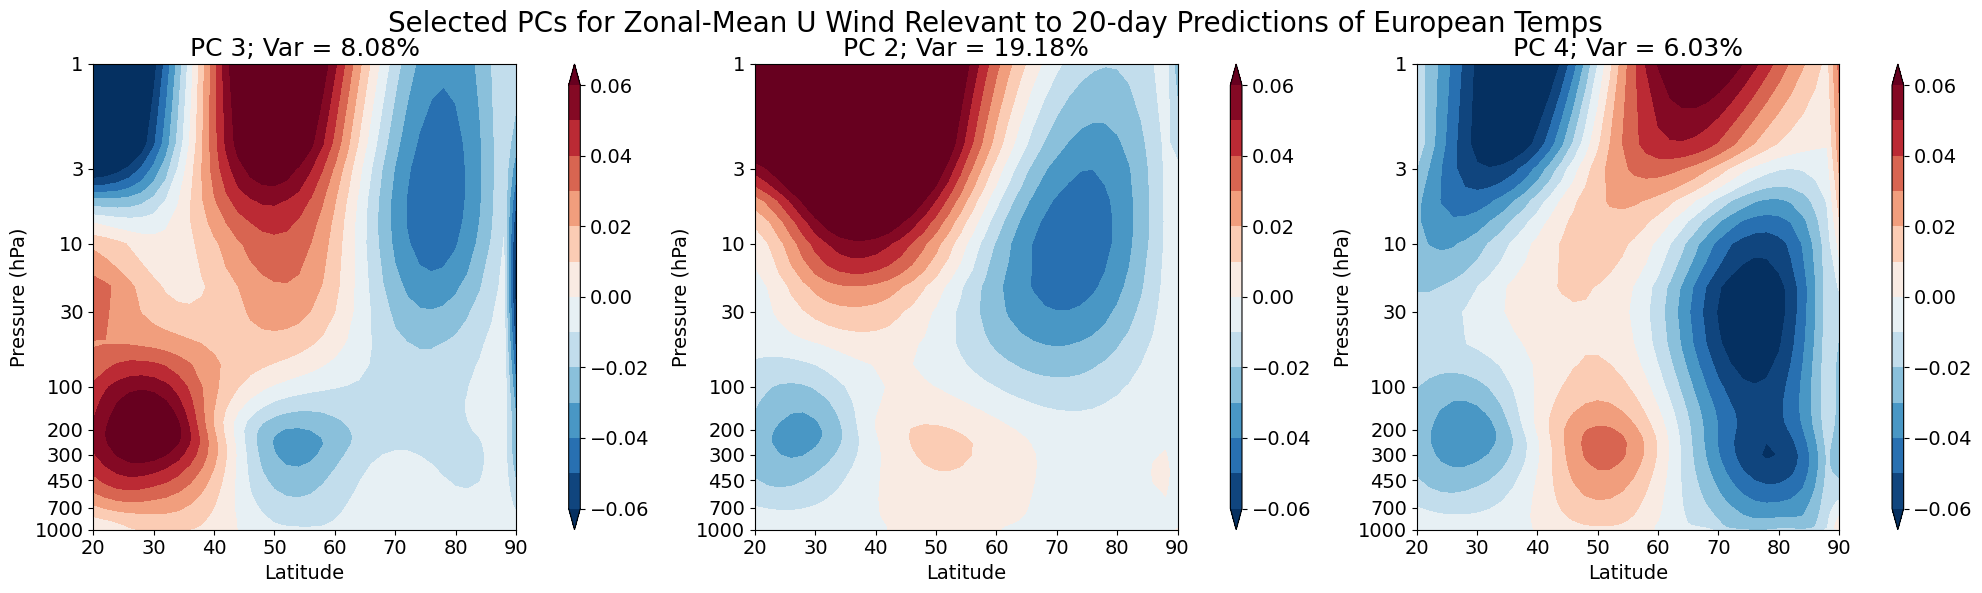

In [12]:
fs = 16
#(20,6) for 3
fig, axes = plt.subplots(1, 3, figsize=(20,6))
plt.suptitle("Selected PCs for Zonal-Mean U Wind Relevant to 20-day Predictions of European Temps",fontsize=20)   

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 3):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = U_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        f"{U_plot[i]}; Var = {round(U_VarEx[PC_ind], 2)}%", fontsize=18
    )

    h = axes[i].contourf(
        lat,
        lev,
        U_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    axes[i].tick_params(labelsize=fs-2)
    axes[i].invert_yaxis()
    axes[i].set_yscale('symlog')
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(20, 90)
    axes[i].set_xlabel('Latitude', fontsize=fs-2)

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.savefig("../images/PCs_eur_U_20.png")
plt.show()

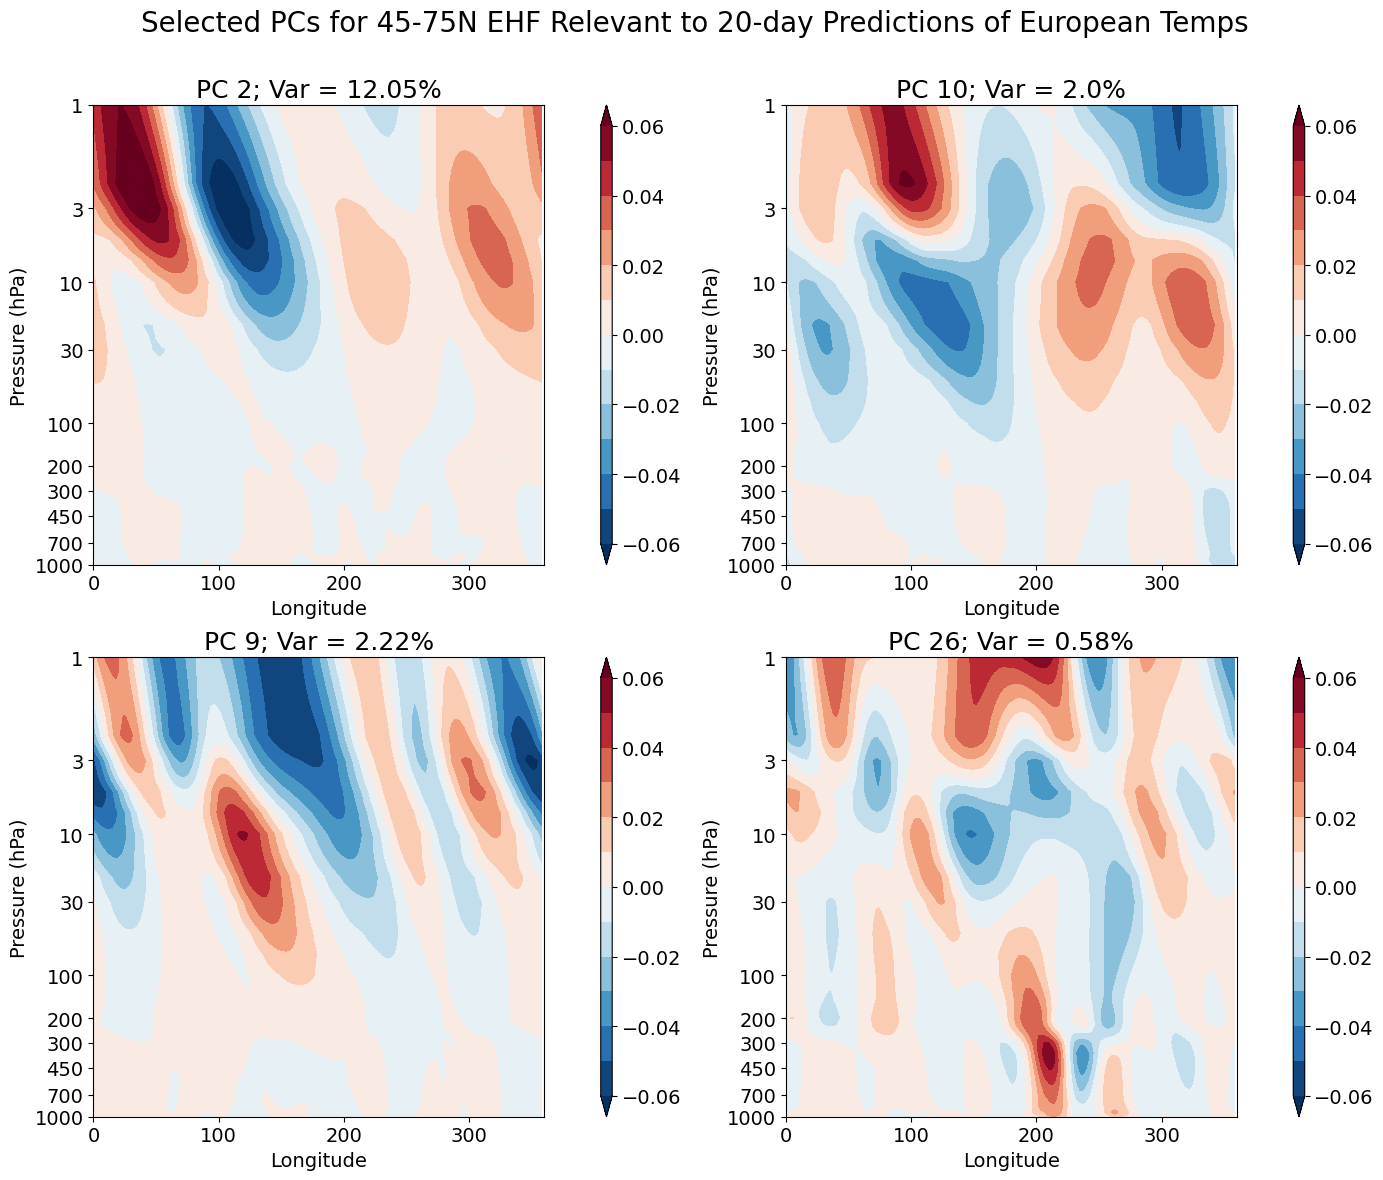

In [13]:
fs = 16

fig, axes = plt.subplots(2,2, figsize=(14, 12))
plt.suptitle("Selected PCs for 45-75N EHF Relevant to 20-day Predictions of European Temps",fontsize=20)   

axes = axes.flatten()
#remove the last (empty) axis
#fig.delaxes(axes.flatten()[-1]) 

for i in range(0, 4):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = EHF_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        str(EHF_plot[i]) + "; Var = " + str(round(EHF_VarEx[PC_ind], 2)) + "%", fontsize=18
    )
    h = axes[i].contourf(
        lon,
        lev,
        EHF_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)
    
    axes[i].tick_params(labelsize=fs-2)
    axes[i].invert_yaxis()
    axes[i].set_yscale('symlog')
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-2)
       

plt.tight_layout()
plt.savefig("../images/PCs_eur_EHF_20.png")
plt.subplots_adjust(top=0.9)

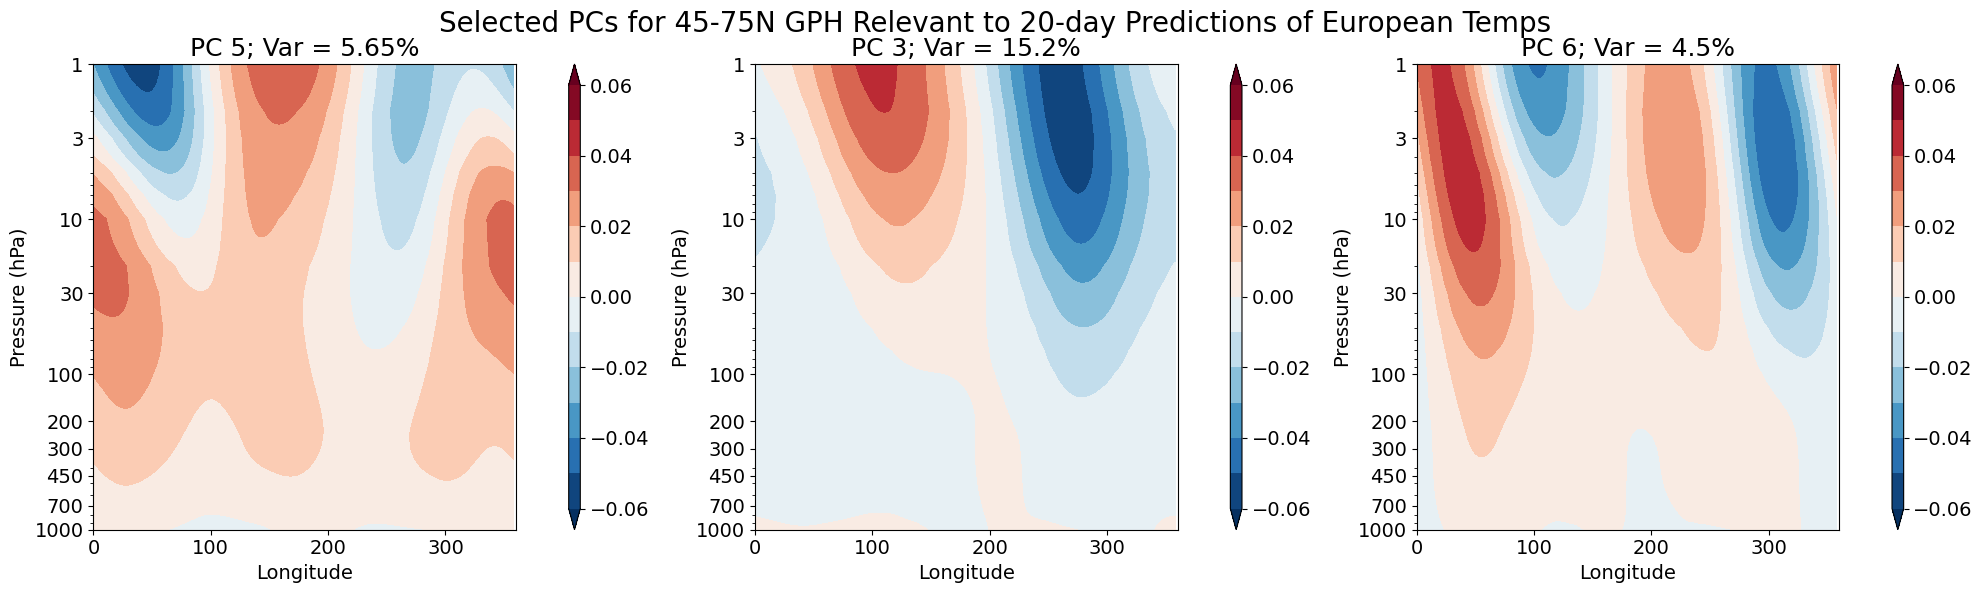

In [14]:
#constants
H = 7.5  #scale height in km
p0 = 1000  #reference pressure in hPa
#convert pressure levels to scale height (altitude in km)
height = -H * np.log(np.array(lev) / p0)

fs = 16

fig, axes = plt.subplots(1, 3, figsize=(20,6))
plt.suptitle("Selected PCs for 45-75N GPH Relevant to 20-day Predictions of European Temps",fontsize=20)

axes = axes.flatten()
#fig.delaxes(axes.flatten()[-1]) 

for i in range(0, 3):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = GPH_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        str(GPH_plot[i]) + "; Var = " + str(round(GPH_VarEx[PC_ind], 2)) + "%", fontsize=18
    )
    h = axes[i].contourf(
        lon,
        lev,
        GPH_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    #axes[i].set_ylabel("Altitude (km)", fontsize=fs)
    #axes[i].set_yticks([0, 5, 10, 15, 20, 25, 30])
    #axes[i].set_ylim(height.max(), height.min())
    #axes[i].invert_yaxis()
    axes[i].tick_params(labelsize=fs-2)
    axes[i].set_yscale('log')
    axes[i].invert_yaxis()
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-2)
   

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.savefig("../images/PCs_eur_GPH_20.png")
#plt.savefig("PCs_GPH.png")

In [16]:
#NOVA Index([1, 56, 0, 55, 54, 4, 2, 53, 57, 9], dtype='int64')

area = ["Nova Scotia", "nova"]

U_plot = ["PC 3", "PC 2", "PC 4", "PC 6"]
##1, 0, 4, 2
U_index = [1,0,4,2]

EHF_plot = ["PC 2"]
##9             
EHF_index = [0]

GPH_plot = ["PC 5", "PC 4", "PC 3", "PC 2", "PC 6"]
##56, 55, 54, 53, 57
GPH_index = [3, 2, 1, 0, 4]

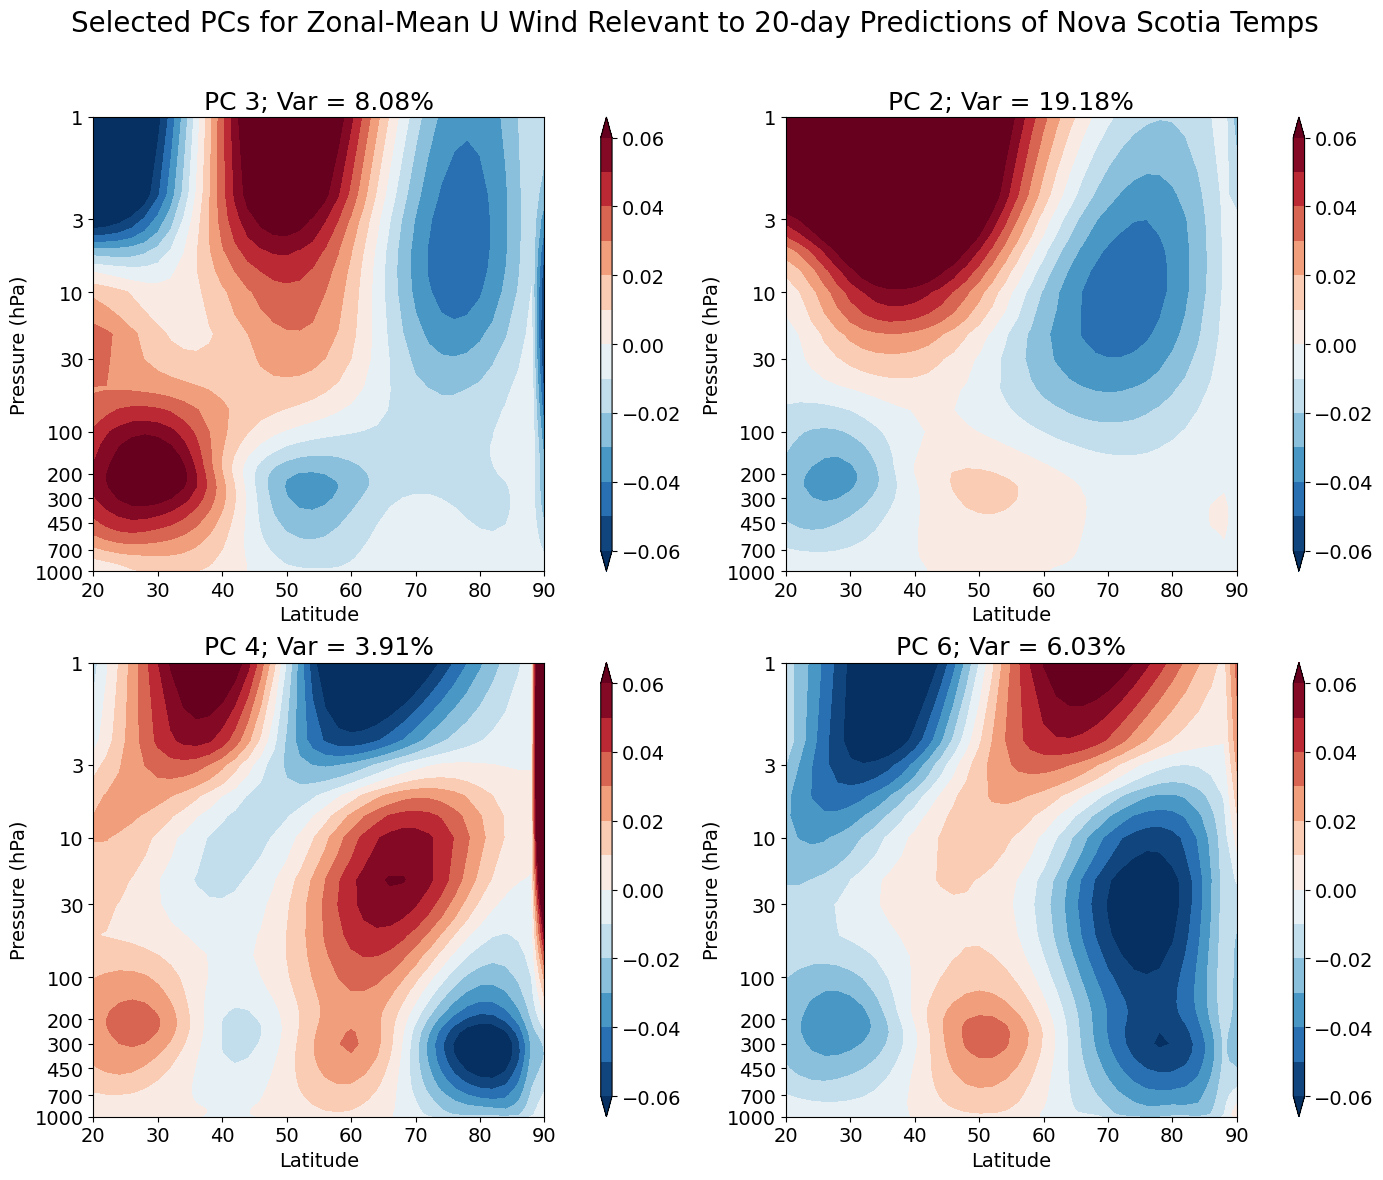

In [17]:
fs = 16
#(20,6) for 3
fig, axes = plt.subplots(2, 2, figsize=(14,12))
plt.suptitle("Selected PCs for Zonal-Mean U Wind Relevant to 20-day Predictions of Nova Scotia Temps",fontsize=20)   

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 4):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = U_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        f"{U_plot[i]}; Var = {round(U_VarEx[PC_ind], 2)}%", fontsize=18
    )

    h = axes[i].contourf(
        lat,
        lev,
        U_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    axes[i].tick_params(labelsize=fs-2)
    axes[i].invert_yaxis()
    axes[i].set_yscale('symlog')
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(20, 90)
    axes[i].set_xlabel('Latitude', fontsize=fs-2)

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.savefig("../images/PCs_nova_U_20.png")
plt.show()

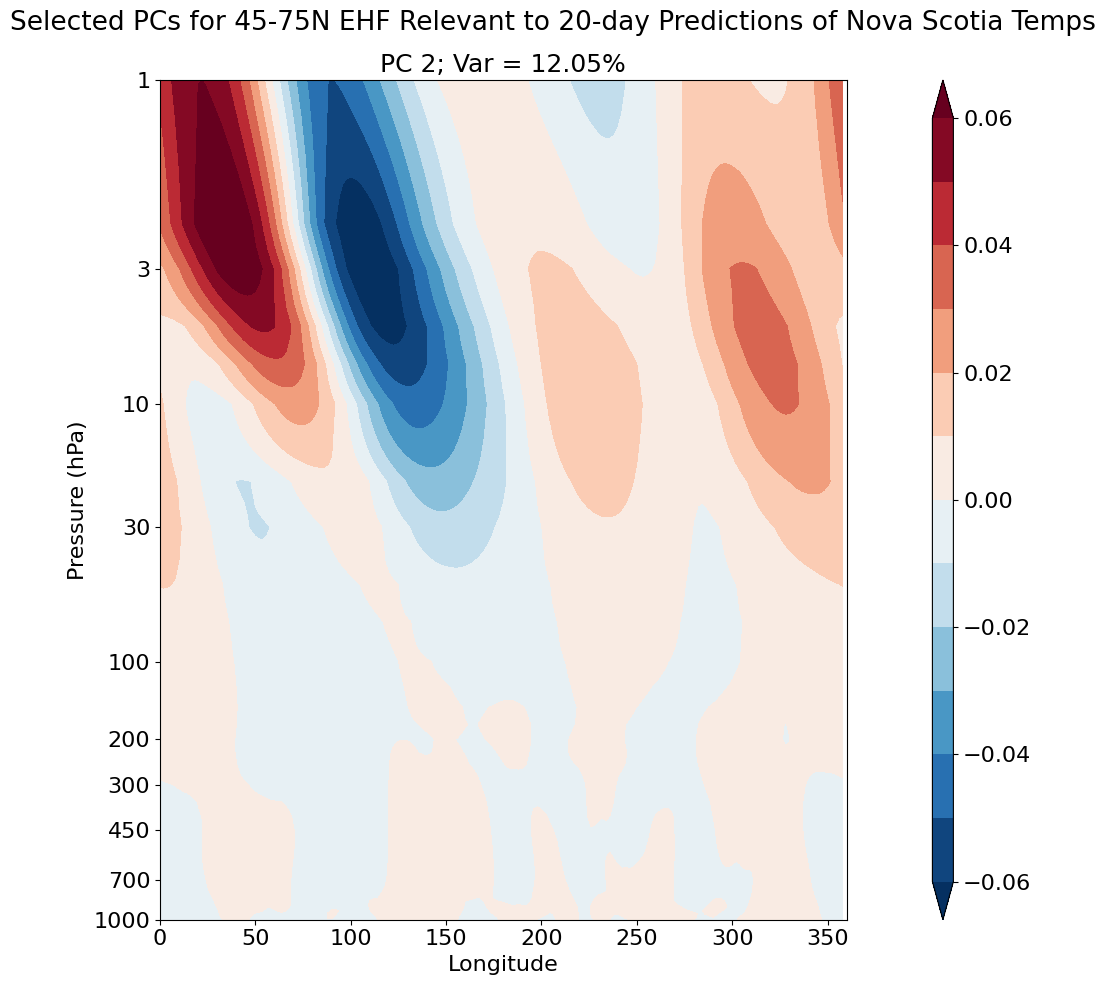

In [30]:
fs = 18

fig, axes = plt.subplots(1,1, figsize=(10,10))
plt.suptitle("Selected PCs for 45-75N EHF Relevant to 20-day Predictions of Nova Scotia Temps",fontsize=19)   

#axes = axes.flatten()
#remove the last (empty) axis
#fig.delaxes(axes.flatten()[-1]) 

for i in range(0, 1):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = EHF_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes.set_title(
        str(EHF_plot[i]) + "; Var = " + str(round(EHF_VarEx[PC_ind], 2)) + "%", fontsize=18
    )
    h = axes.contourf(
        lon,
        lev,
        EHF_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)
    
    axes.tick_params(labelsize=fs-2)
    axes.invert_yaxis()
    axes.set_yscale('symlog')
    axes.set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes.set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes.get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes.set_xlim(0, 360)
    axes.set_xlabel('Longitude', fontsize=fs-2)
       

plt.tight_layout()
plt.savefig("../images/PCs_nova_EHF_20.png")
plt.subplots_adjust(top=0.91)

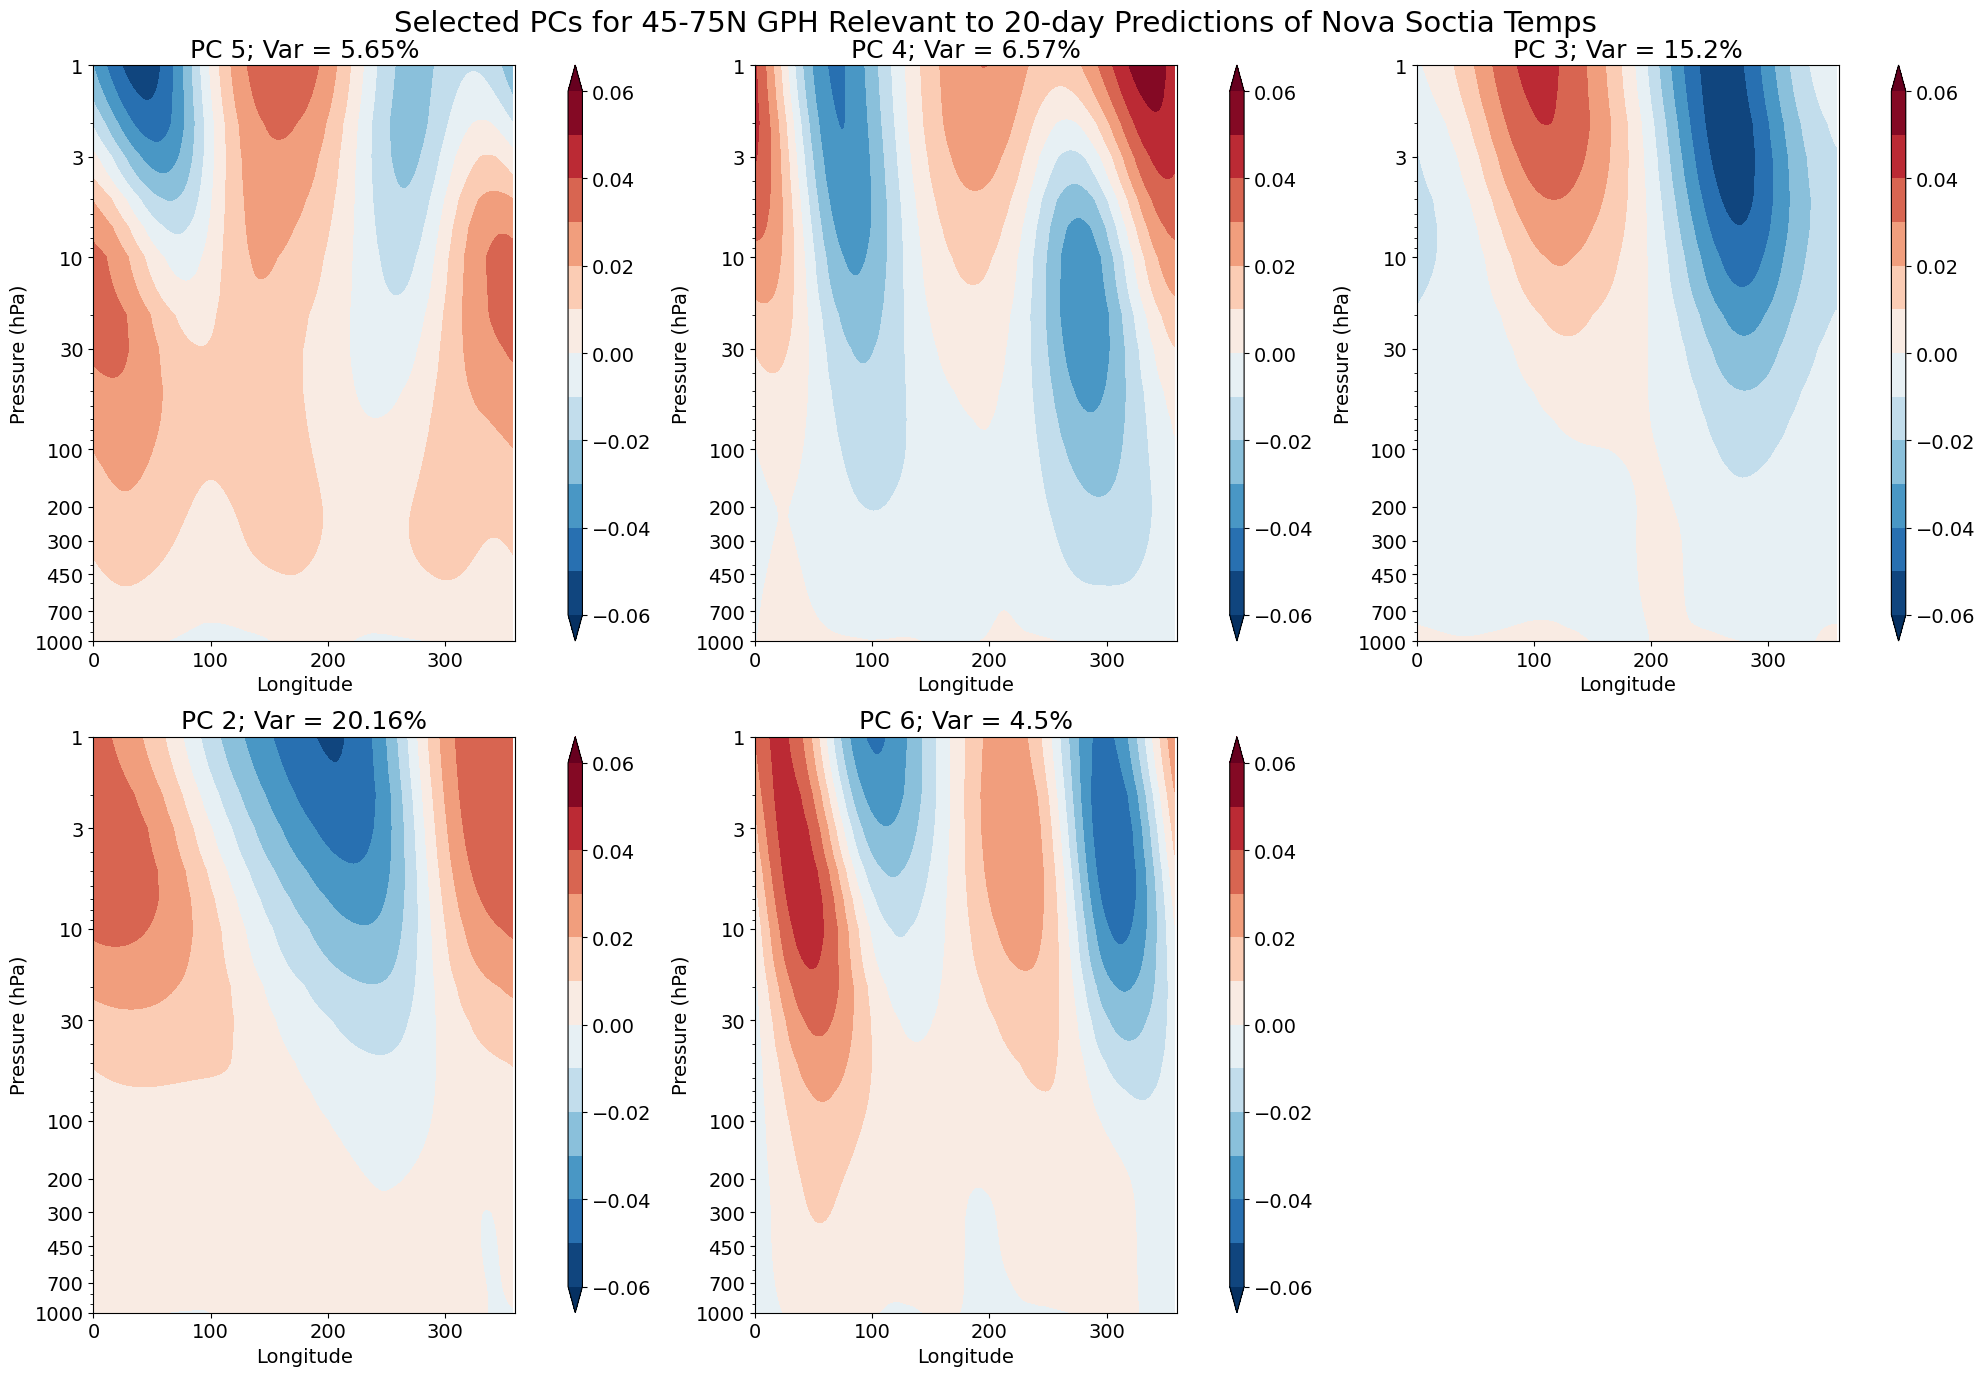

In [35]:
#constants
H = 7.5  #scale height in km
p0 = 1000  #reference pressure in hPa
#convert pressure levels to scale height (altitude in km)
height = -H * np.log(np.array(lev) / p0)

fs = 16

fig, axes = plt.subplots(2, 3, figsize=(20,14))
plt.suptitle("Selected PCs for 45-75N GPH Relevant to 20-day Predictions of Nova Soctia Temps",fontsize=21)

axes = axes.flatten()
fig.delaxes(axes.flatten()[-1]) 

for i in range(0, 5):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = GPH_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        str(GPH_plot[i]) + "; Var = " + str(round(GPH_VarEx[PC_ind], 2)) + "%", fontsize=18
    )
    h = axes[i].contourf(
        lon,
        lev,
        GPH_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    #axes[i].set_ylabel("Altitude (km)", fontsize=fs)
    #axes[i].set_yticks([0, 5, 10, 15, 20, 25, 30])
    #axes[i].set_ylim(height.max(), height.min())
    #axes[i].invert_yaxis()
    axes[i].tick_params(labelsize=fs-2)
    axes[i].set_yscale('log')
    axes[i].invert_yaxis()
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-2)
   

plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.savefig("../images/PCs_nova_GPH_20.png")
#plt.savefig("PCs_GPH.png")

In [36]:
#SEUS Index([1, 56, 54, 53, 57, 4, 16, 14, 17, 0], dtype='int64')

area = ["SE US", "seus"]

U_plot = ["PC 3", "PC 6", "PC 2"]
## 1, 4, 0
U_index = [1, 4, 0]

EHF_plot = ["PC 9", "PC 7", "PC 10"]
##16, 14, 17
EHF_index = [7, 5, 8]

GPH_plot = ["PC 5", "PC 3", "PC 2", "PC 4"]
##56, 54, 53, 57
GPH_index = [3, 1, 0, 4]

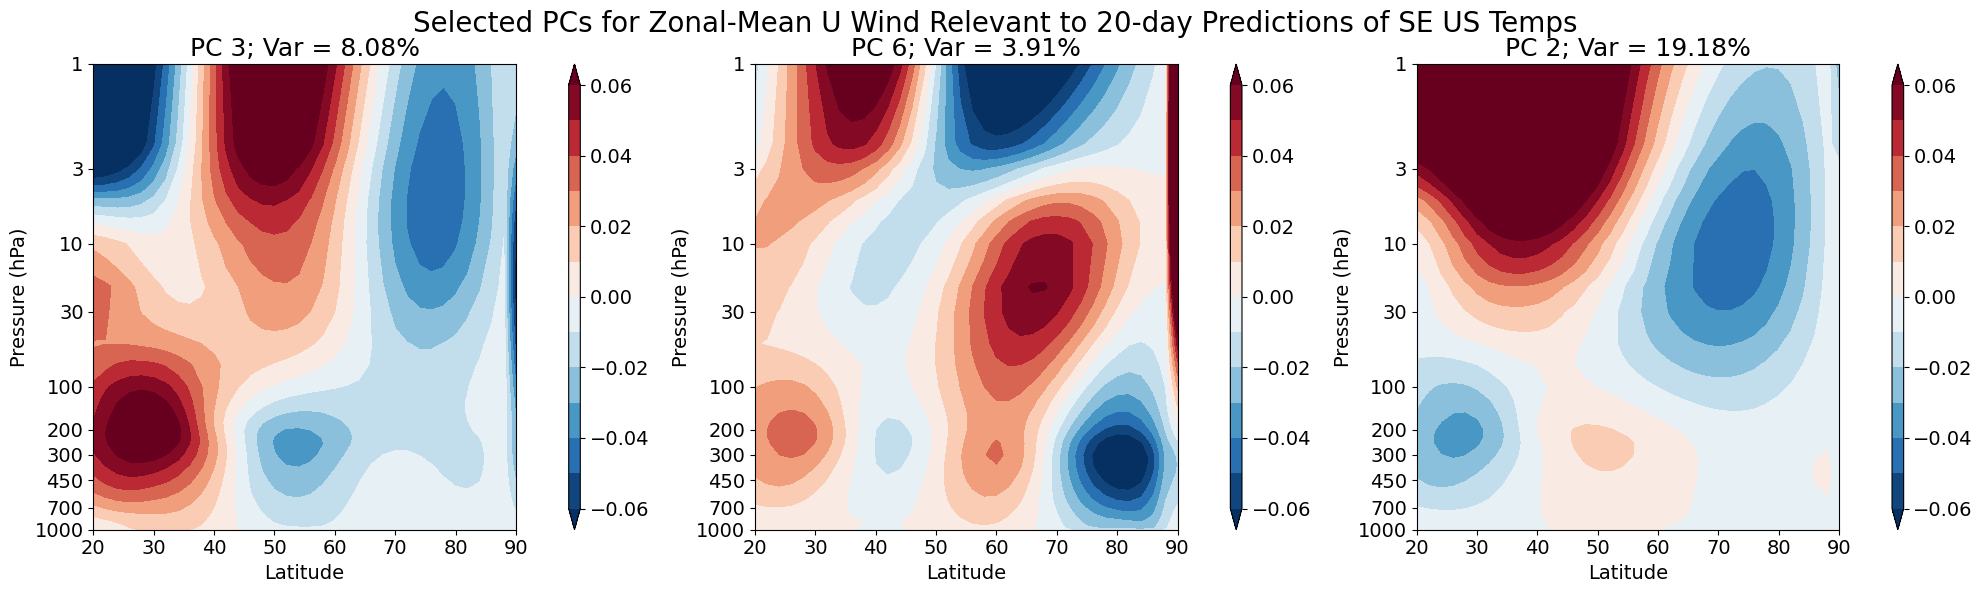

In [37]:
fs = 16
#(20,6) for 3
fig, axes = plt.subplots(1, 3, figsize=(20,6))
plt.suptitle("Selected PCs for Zonal-Mean U Wind Relevant to 20-day Predictions of SE US Temps",fontsize=20)   

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 3):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = U_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        f"{U_plot[i]}; Var = {round(U_VarEx[PC_ind], 2)}%", fontsize=18
    )

    h = axes[i].contourf(
        lat,
        lev,
        U_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    axes[i].tick_params(labelsize=fs-2)
    axes[i].invert_yaxis()
    axes[i].set_yscale('symlog')
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(20, 90)
    axes[i].set_xlabel('Latitude', fontsize=fs-2)

plt.tight_layout()
plt.subplots_adjust(top=0.89)
plt.savefig("../images/PCs_seus_U_20.png")
plt.show()

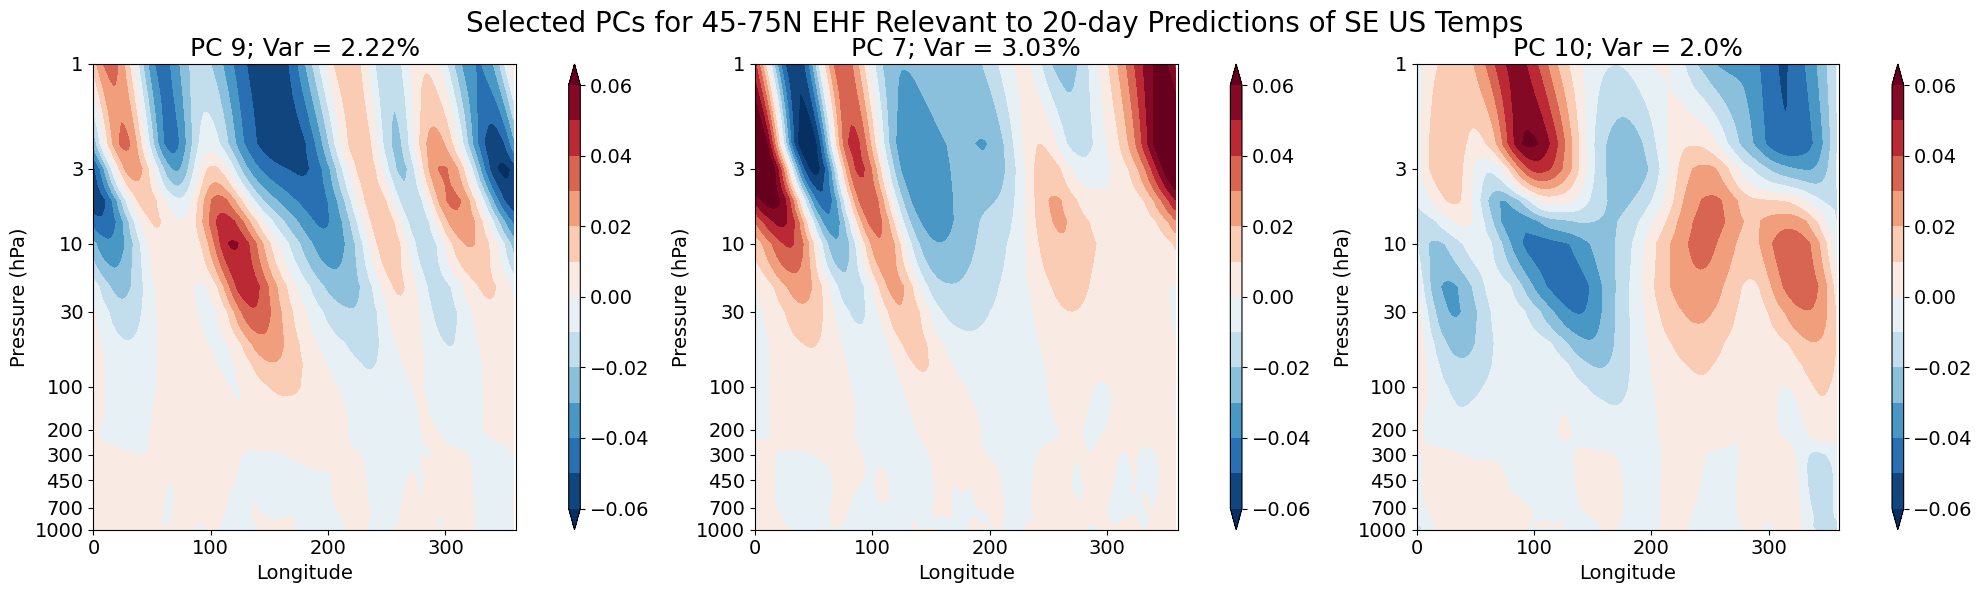

In [40]:
fs = 16

fig, axes = plt.subplots(1,3, figsize=(20, 6))
plt.suptitle("Selected PCs for 45-75N EHF Relevant to 20-day Predictions of SE US Temps",fontsize=20)   

axes = axes.flatten()
#remove the last (empty) axis
#fig.delaxes(axes.flatten()[-1]) 

for i in range(0, 3):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = EHF_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        str(EHF_plot[i]) + "; Var = " + str(round(EHF_VarEx[PC_ind], 2)) + "%", fontsize=18
    )
    h = axes[i].contourf(
        lon,
        lev,
        EHF_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)
    
    axes[i].tick_params(labelsize=fs-2)
    axes[i].invert_yaxis()
    axes[i].set_yscale('symlog')
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-2)
       

plt.tight_layout()
plt.savefig("../images/PCs_seus_EHF_20.png")
plt.subplots_adjust(top=0.89)

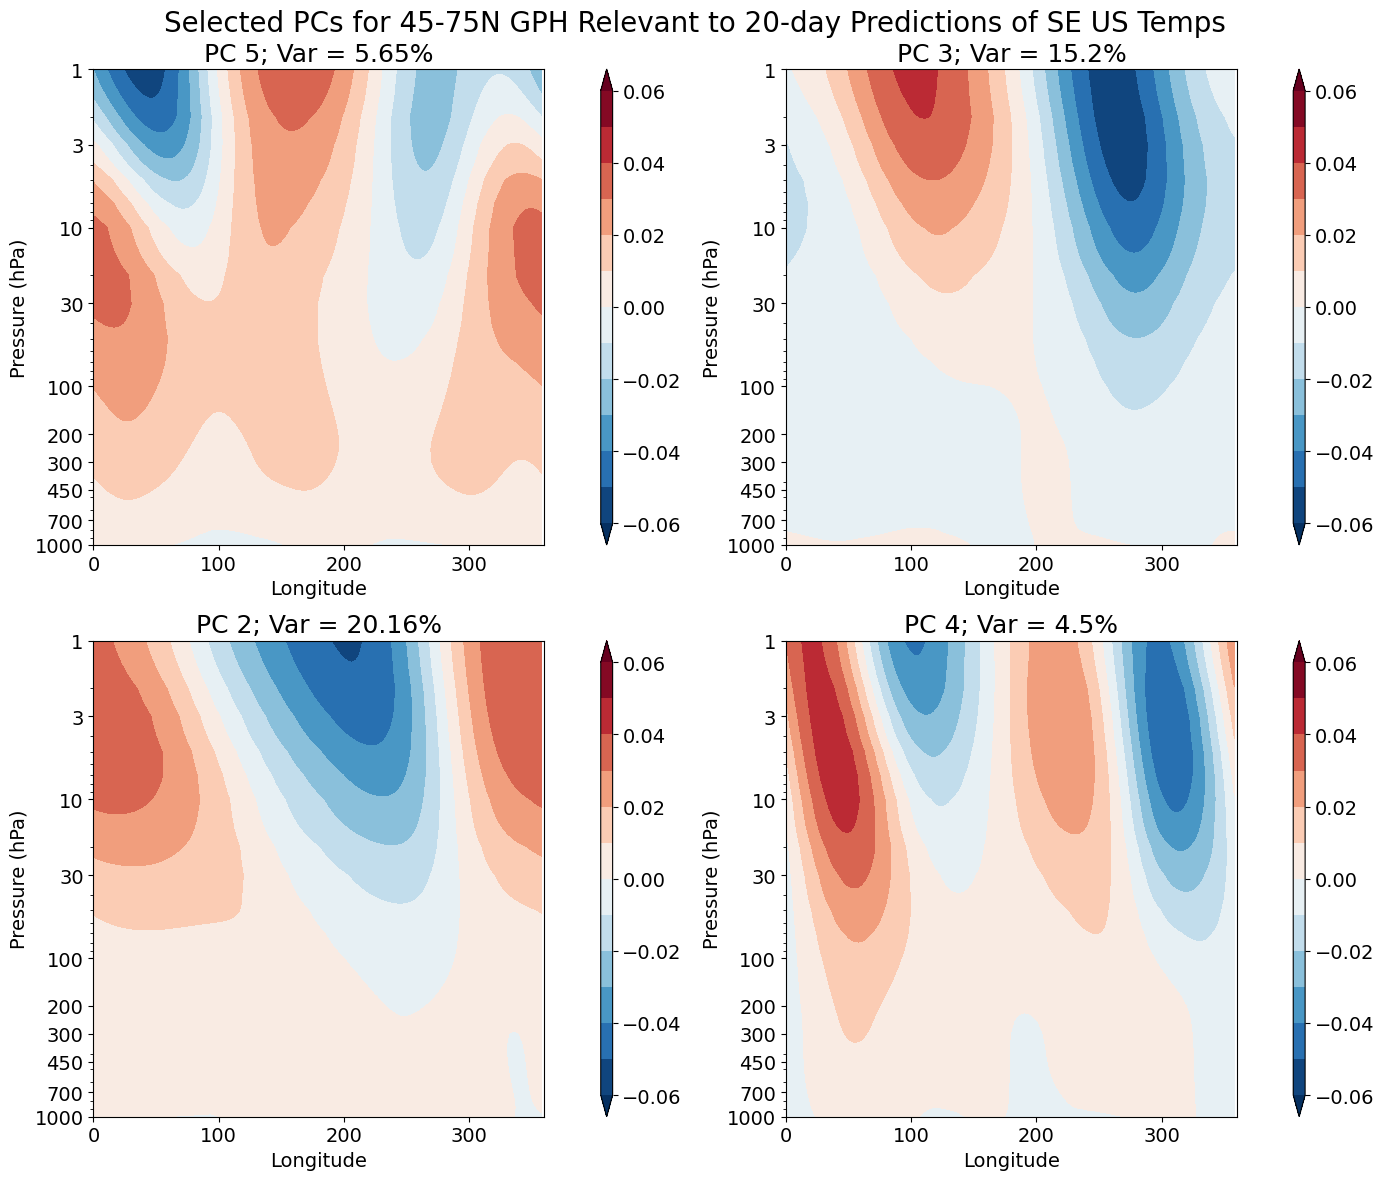

In [42]:
#constants
H = 7.5  #scale height in km
p0 = 1000  #reference pressure in hPa
#convert pressure levels to scale height (altitude in km)
height = -H * np.log(np.array(lev) / p0)

fs = 16

fig, axes = plt.subplots(2, 2, figsize=(14,12))
plt.suptitle("Selected PCs for 45-75N GPH Relevant to 20-day Predictions of SE US Temps",fontsize=20)

axes = axes.flatten()
#fig.delaxes(axes.flatten()[-1]) 

for i in range(0, 4):
    color = "RdBu_r"
    # colorbar options:
    colorbarMin = -0.06
    colorbarMax = 0.06
    colorspace = 0.01

    PC_ind = GPH_index[i]

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title(
        str(GPH_plot[i]) + "; Var = " + str(round(GPH_VarEx[PC_ind], 2)) + "%", fontsize=18
    )
    h = axes[i].contourf(
        lon,
        lev,
        GPH_EOF_nw[PC_ind, :, :],
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    #axes[i].set_ylabel("Altitude (km)", fontsize=fs)
    #axes[i].set_yticks([0, 5, 10, 15, 20, 25, 30])
    #axes[i].set_ylim(height.max(), height.min())
    #axes[i].invert_yaxis()
    axes[i].tick_params(labelsize=fs-2)
    axes[i].set_yscale('log')
    axes[i].invert_yaxis()
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-2)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-2)
   

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.savefig("../images/PCs_seus_GPH_20.png")
#plt.savefig("PCs_GPH.png")